# Kaggle : Gemstone Price Prediction

In [1]:
#0 Load libraries

import numpy as np
import pandas as pd

import altair as alt
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')


RendererRegistry.enable('mimetype')

## 1. Load data and pre-processing

In [2]:
#1.1 Load train data
train = pd.read_csv('data/train.csv')
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
#1.2 Load test data
test = pd.read_csv('data/test.csv')
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [4]:
#1.3 Check info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
#1.4 Confirm NA
train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
#1.5 Check size of each dataset
print(train.shape)
print(test.shape)

(193573, 11)
(129050, 10)


## 2. EDA

In [7]:
#2.1 Check info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
#2.2 Pulling all features
train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [9]:
#2.3 Separate features into each group
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
discreteized_features = []
categorical_features = ['cut', 'color', 'clarity']
text_features = []
drop_features = ['id']

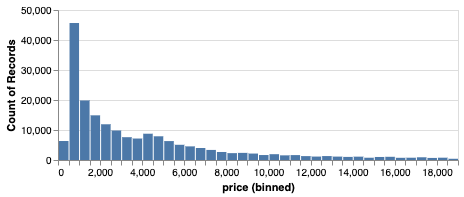

In [10]:
#2.3.1 Numerical feature distributions - price
hist = alt.Chart(train).mark_bar().encode(
     x = alt.X('price', type='quantitative', bin=alt.Bin(maxbins=40)),
     y = 'count()',
).properties(
    width=400,
    height=150
)
# Show the plot
hist

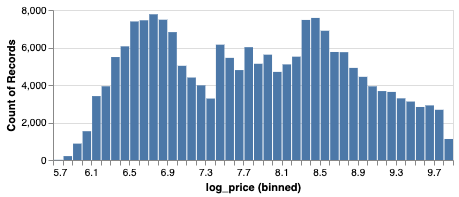

In [11]:
#2.3.2 Numerical feature distributions - log_price
train['log_price'] = np.log(train['price'])
hist = alt.Chart(train).mark_bar().encode(
     x = alt.X('log_price', type='quantitative', bin=alt.Bin(maxbins=50)),
     y = 'count()',
).properties(
    width=400,
    height=150
)
# Show the plot
hist

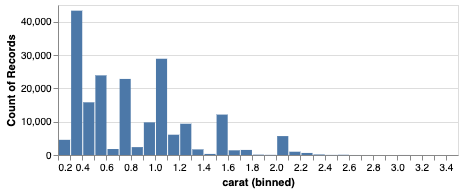

In [12]:
#2.3.3 Numerical feature distributions - carat
hist = alt.Chart(train).mark_bar().encode(
     x = alt.X('carat', type='quantitative', bin=alt.Bin(maxbins=50)),
     y = 'count()',
).properties(
    width=400,
    height=150
)
# Show the plot
hist

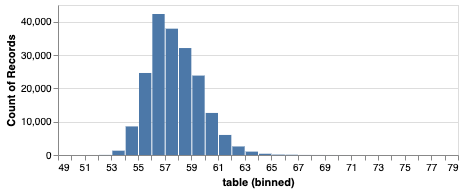

In [13]:
#2.3.4 Numerical feature distributions - table
hist = alt.Chart(train).mark_bar().encode(
     x = alt.X('table', type='quantitative', bin=alt.Bin(maxbins=50)),
     y = 'count()',
).properties(
    width=400,
    height=150
)
# Show the plot
hist

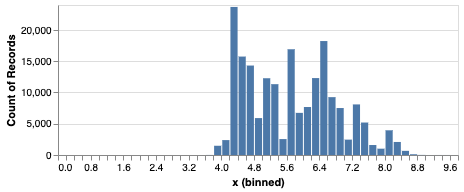

In [14]:
#2.3.5 Numerical feature distributions - x
hist = alt.Chart(train).mark_bar().encode(
     x = alt.X('x', type='quantitative', bin=alt.Bin(maxbins=50)),
     y = 'count()',
).properties(
    width=400,
    height=150
)
# Show the plot
hist

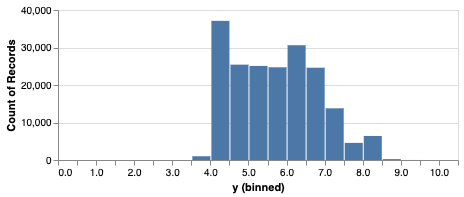

In [15]:
#2.3.6 Numerical feature distributions - y
hist = alt.Chart(train).mark_bar().encode(
     x = alt.X('y', type='quantitative', bin=alt.Bin(maxbins=50)),
     y = 'count()',
).properties(
    width=400,
    height=150
)
# Show the plot
hist

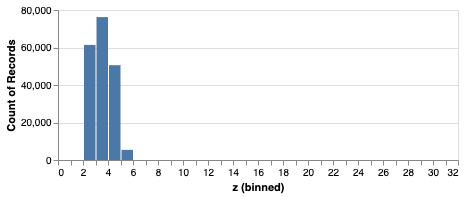

In [16]:
#2.3.7 Numerical feature distributions - z
hist = alt.Chart(train).mark_bar().encode(
     x = alt.X('z', type='quantitative', bin=alt.Bin(maxbins=50)),
     y = 'count()',
).properties(
    width=400,
    height=150
)
# Show the plot
hist

In [17]:
#2.3.8.1 Categorical feature distributions - cut - value_counts()
train['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

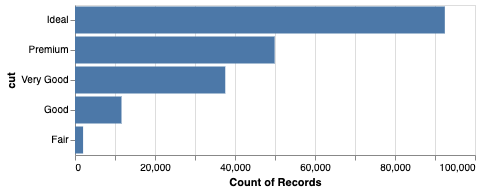

In [18]:
#2.3.8.2 Categorical feature distributions - cut
bar = alt.Chart(train).mark_bar().encode(
    x = 'count()',
    y = alt.Y('cut', type='nominal', sort='-x')
     ,
).properties(
    width=400,
    height=150
)
# Show the plot
bar

In [19]:
#2.3.9.1 Categorical feature distributions - color - value_counts()
train['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

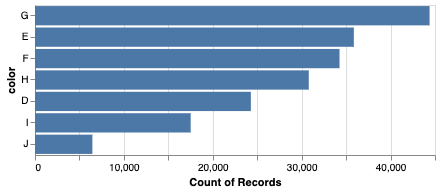

In [20]:
#2.3.9.2 Categorical feature distributions - color
bar = alt.Chart(train).mark_bar().encode(
    x = 'count()',
    y = alt.Y('color', type='nominal', sort='-x')
     ,
).properties(
    width=400,
    height=150
)
# Show the plot
bar

In [21]:
#2.3.10.1 Categorical feature distributions - clarity - value_counts()
train['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

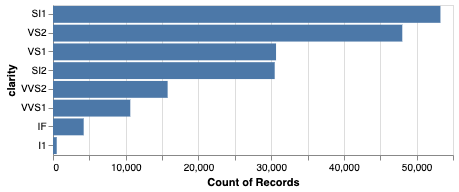

In [22]:
#2.3.9.10 Categorical feature distributions - clarity
bar = alt.Chart(train).mark_bar().encode(
    x = 'count()',
    y = alt.Y('clarity', type='nominal', sort='-x')
     ,
).properties(
    width=400,
    height=150
)
# Show the plot
bar

In [23]:
#2.4 Correlation matrix : Spearman
train.corr('pearson').style.background_gradient().format(precision=2)

,id,carat,depth,table,x,y,z,price,log_price
id,1.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
carat,-0.00,1.00,0.03,0.23,0.98,0.98,0.97,0.94,0.94
depth,0.00,0.03,1.00,-0.23,-0.01,-0.01,0.08,0.00,0.01
table,0.00,0.23,-0.23,1.00,0.24,0.23,0.21,0.17,0.21
x,-0.00,0.98,-0.01,0.24,1.00,1.00,0.99,0.90,0.97
y,-0.00,0.98,-0.01,0.23,1.00,1.00,0.99,0.90,0.97
z,0.00,0.97,0.08,0.21,0.99,0.99,1.00,0.89,0.97
price,-0.00,0.94,0.00,0.17,0.90,0.90,0.89,1.00,0.90
log_price,-0.00,0.94,0.01,0.21,0.97,0.97,0.97,0.90,1.00


In [24]:
#2.4 Correlation matrix : Spearman
train.corr('spearman').style.background_gradient().format(precision=2)

,id,carat,depth,table,x,y,z,price,log_price
id,1.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
carat,-0.00,1.00,0.04,0.24,1.00,1.00,1.00,0.97,0.97
depth,0.00,0.04,1.00,-0.16,-0.01,-0.01,0.11,0.03,0.03
table,0.00,0.24,-0.16,1.00,0.24,0.23,0.21,0.22,0.22
x,-0.00,1.00,-0.01,0.24,1.00,1.00,0.99,0.97,0.97
y,-0.00,1.00,-0.01,0.23,1.00,1.00,0.99,0.97,0.97
z,-0.00,1.00,0.11,0.21,0.99,0.99,1.00,0.97,0.97
price,-0.00,0.97,0.03,0.22,0.97,0.97,0.97,1.00,1.00
log_price,-0.00,0.97,0.03,0.22,0.97,0.97,0.97,1.00,1.00


## 3. Feature engineering and Feature selection

In [25]:
#3.1 Separate X_train, y_train, X_test, y_test
X_train = train.drop(columns=['price'])
# X_test = test.drop(columns=['price'])
# y_train = train['price']
# y_test = test['price']